# Calculating NDVI

In [1]:
import ee, datetime
import pandas as pd
from pylab import *
from matplotlib.pylab import rcParams
from netCDF4 import Dataset
import numpy as np
%matplotlib inline

In [2]:
ee.Initialize()

In [3]:
L8 = ee.ImageCollection("LANDSAT/LC08/C01/T1_TOA")

In [4]:
roi = {'type':'Point', 'coordinates':[ 58.035420, 26.344237 ]} #village Estonia

In [5]:
L8time = L8.filterDate('2016-01-01', '2016-12-31') #YYYY-MM-DD

In [6]:
info = L8time.getRegion(roi, 500).getInfo()

In [7]:
header = info[0]
data = array(info[1:])

iTime = header.index('time')
#time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]
time = [datetime.date.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]
print(time[2])





# List of used image bands
band_list = ['B4','B5']

iBands = [header.index(b) for b in band_list]
yData = data[0:,iBands].astype(np.float)

# Calculate NDVI
red = yData[:,0]
nir = yData[:,1]
ndvi = (nir - red) / (nir + red)

2016-02-03


In [8]:
df = pd.DataFrame(data=ndvi, index=list(range(len(ndvi))), columns=['NDVI'])

print("this is", df)
df = df.interpolate()

df['Date'] = pd.Series(time, index=df.index)

#b = (df.Date-df.Date.min()).astype('timedelta64[D]').astype(int)+1

df['Date'] = pd.Series(             (df.Date-df.Date.min()).astype('timedelta64[D]').astype(int)+1                  ,                         index=df.index)


this is         NDVI
0   0.006984
1   0.007906
2   0.010567
3   0.011927
4   0.009198
5   0.010083
6   0.007921
7   0.015538
8   0.012658
9   0.015608
10  0.015992
11  0.016713
12  0.020327
13  0.010793
14  0.006011
15  0.010602
16  0.003778
17  0.007980
18  0.005894
19  0.005122
20  0.007661
21 -0.000753
22  0.005486
23  0.009210
24  0.015187
25  0.013397
26  0.005977
27  0.020887
28  0.016969
29  0.012360
30  0.017654
31  0.010164
32  0.030850
33  0.018206
34  0.018607
35  0.012601
36  0.012066
37  0.010346
38  0.008747
39  0.002928
40  0.009323
41  0.005315
42  0.010551
43  0.007328
44  0.005511


In [9]:
df_sorted = df.sort_values('Date')

In [10]:
df_perfect = df_sorted.reset_index() 
df_perfect = df_perfect.drop('index', axis = 1)

In [11]:
df_perfect

NDVI  Date
0   0.006984     1
1   0.005486     8
2   0.007906    17
3   0.009210    24
4   0.010567    33
5   0.015187    40
6   0.011927    49
7   0.013397    56
8   0.009198    65
9   0.005977    72
10  0.020887    88
11  0.010083    97
12  0.016969   104
13  0.007921   113
14  0.012360   120
15  0.015538   129
16  0.017654   136
17  0.012658   145
18  0.010164   152
19  0.015608   161
20  0.030850   168
21  0.015992   177
22  0.018206   184
23  0.016713   193
24  0.018607   200
25  0.020327   209
26  0.012601   216
27  0.010793   225
28  0.012066   232
29  0.006011   241
30  0.010346   248
31  0.010602   257
32  0.008747   264
33  0.003778   273
34  0.002928   280
35  0.007980   289
36  0.009323   296
37  0.005894   305
38  0.005315   312
39  0.005122   321
40  0.010551   328
41  0.007661   337
42  0.007328   344
43 -0.000753   353
44  0.005511   360

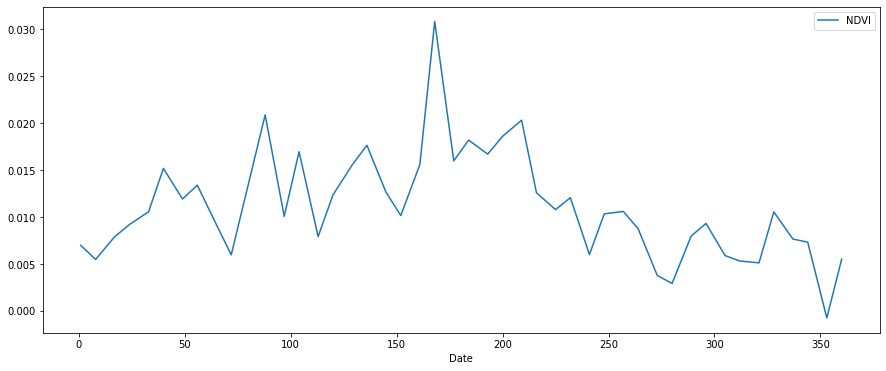

In [12]:
rcParams['figure.figsize'] = 15, 6
df_perfect.plot(y='NDVI',x='Date')
plt.show()

# Extracting LAI from output file and plotting

In [13]:
output_file = '2005.nc'
file = Dataset(output_file, mode='r')

In [14]:
LAI = file.variables['LAI'][:]
TIME = file.variables['time'][:]

In [15]:
#dataset = pd.Datarame({'Column1': LAI[:, 0]})
l =  np.ma.filled(LAI)
t =  np.ma.filled(TIME)

In [16]:
ll = l.ravel()
tt = t.ravel()

In [17]:
ldf = pd.DataFrame({'LAI':ll, 'Time':tt})


In [18]:
ldf

LAI      Time
0    2.349221    0.3125
1    2.348289    0.6875
2    2.347683    1.3125
3    2.346751    1.6875
4    2.346146    2.3125
..        ...       ...
723  2.722487  361.6875
724  2.721788  362.3125
725  2.720670  362.6875
726  2.720018  363.3125
727  2.718900  363.6875

[728 rows x 2 columns]

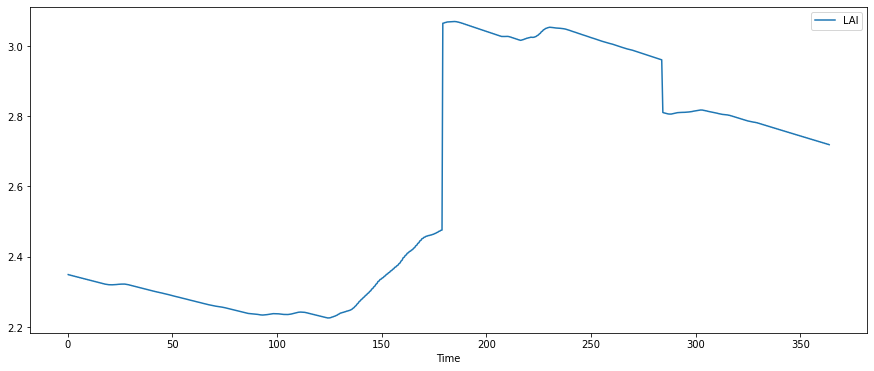

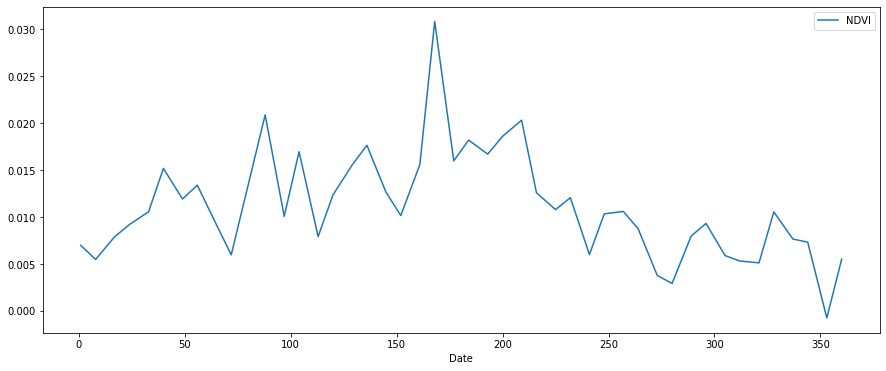

In [19]:
rcParams['figure.figsize'] = 15, 6
ldf.plot(y='LAI',x='Time')
df_perfect.plot(y='NDVI',x='Date')
plt.show()

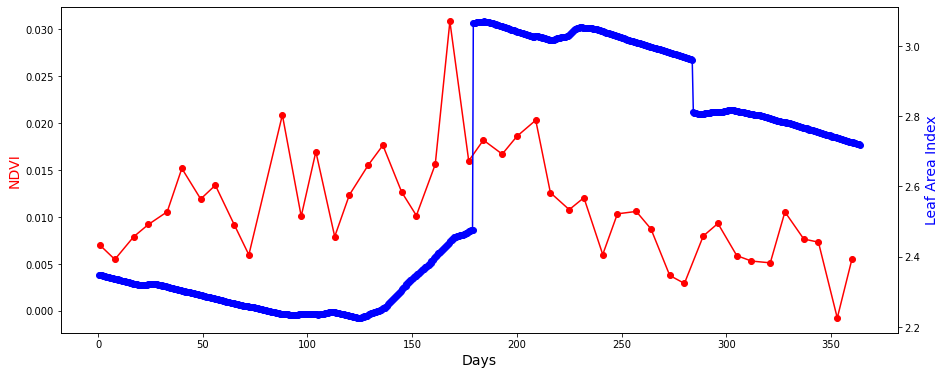

In [20]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_perfect.Date, df_perfect.NDVI, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Days",fontsize=14)
# set y-axis label
ax.set_ylabel("NDVI",color="red",fontsize=14)



# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ldf.Time, ldf.LAI,color="blue",marker="o")
ax2.set_ylabel("Leaf Area Index",color="blue",fontsize=14)
plt.show()
